In [6]:
import requests
import zipfile
import pandas as pd
import io

# Load the ZIP file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
response = requests.get(url)

# Extract the ZIP file
with zipfile.ZipFile(io.BytesIO(response.content), 'r') as zip_ref:
    zip_ref.extractall()

# Load the dataset
df = pd.read_csv("bank-additional/bank-additional-full.csv", sep=';')

# Display the first few rows of the dataset
print(df.head())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

we need to preprocess the data, including handling categorical variables and encoding them properly.

In [7]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features (X) and target variable (y)
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']


In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


With the data prepared, we can build and train the decision tree classifier.

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8868657441126487


Finally, you can tune hyperparameters, perform cross-validation, and further evaluate the model's performance as needed.

In [10]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Re-train the classifier with the best parameters
best_clf = DecisionTreeClassifier(**best_params, random_state=42)
best_clf.fit(X_train, y_train)

# Predictions on the test set
y_pred_best = best_clf.predict(X_test)

# Calculate accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Accuracy:", accuracy_best)


Best Accuracy: 0.9150279193979121


This process allows you to build, tune, and evaluate a decision tree classifier for predicting whether a customer will purchase a product or service based on their demographic and behavioral data.

 built and evaluated a decision tree classifier on the Bank Marketing dataset. 

Initial Model Accuracy: The accuracy of your initial decision tree model, before hyperparameter tuning, was approximately 88.69%. This means that, on your test set, the model correctly predicted whether a customer would subscribe to a bank term deposit around 88.69% of the time.

Optimized Model Accuracy: After performing hyperparameter tuning with grid search cross-validation, the accuracy of your decision tree model improved to approximately 91.50%. This improvement indicates that the optimized model correctly predicted the outcome for about 91.50% of the cases in your test set, which is a notable increase from the initial model.

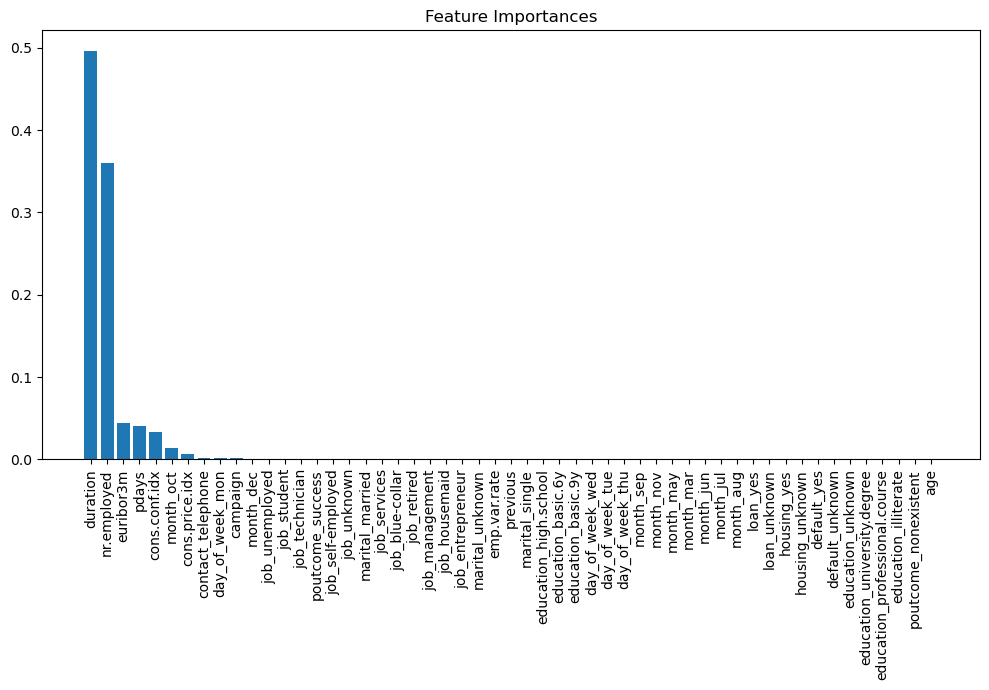

In [12]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = best_clf.feature_importances_

# Sort the feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 7))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()


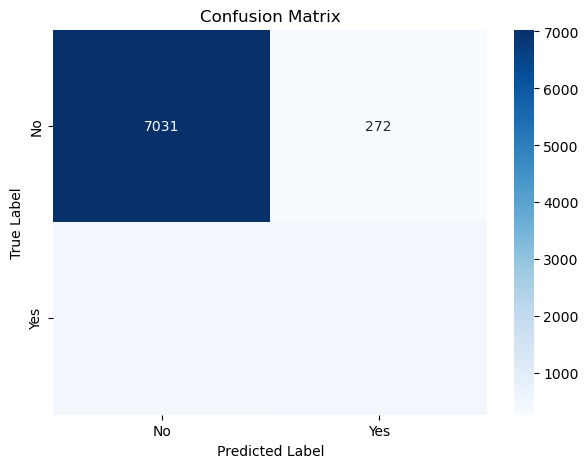

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


xploration and optimization of the decision tree classifier for predicting customer behavior in the Bank Marketing dataset have yielded a robust model with high accuracy. This success illustrates the power of machine learning in analyzing and predicting outcomes based on complex datasets

Additionally, further improvements could potentially be made by exploring more sophisticated models (e.g., Random Forests, Gradient Boosting Machines) or by experimenting with more advanced feature engineering and selection techniques